In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [18]:


def get_normalized_data():
    print("Reading  data...")
    df = pd.read_csv('train.csv')
    data = df.values.astype(np.float32)
    np.random.shuffle(data)
    X = data[:, 1:]
    Y = data[:, 0] #label

    Xtrain = X[:-1000]
    Ytrain = Y[:-1000]
    Xtest  = X[-1000:]
    Ytest  = Y[-1000:]

    # let's normalize the data
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    np.place(std, std == 0, 1)
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    return Xtrain, Xtest, Ytrain, Ytest


In [19]:

def softmax_forward(X, W, b):
    # softmax
    a = X.dot(W) + b
    expa = np.exp(a)
    y = expa / expa.sum(axis=1, keepdims=True)
    return y

In [20]:
def predict(p_y):
    return np.argmax(p_y, axis=1)


def cal_cal_error_rate(p_y, t):
    prediction = predict(p_y)
    return np.mean(prediction != t)


def calculate_cost(p_y, t):
    tot = t * np.log(p_y)
    return -tot.sum()


def gradW(t, y, X):
    #default GD equation for weights 
    return X.T.dot(t - y)
def gradb(t, y):
    #default GD equation for bias 
    return (t - y).sum(axis=0)

In [21]:
def y2indicator(y):
    N = len(y)
    y = y.astype(np.int32)
    ind = np.zeros((N, 10))
    for i in range(N):
        ind[i, y[i]] = 1
    return ind

In [22]:
def Fun_GradientDecent():
    Xtrain, Xtest, Ytrain, Ytest = get_normalized_data()

    print("Starting logistic regression...")
    # lr = LogisticRegression(solver='lbfgs')


    # convert Ytrain and Ytest to (N x K) matrices of indicator variables
    N, D = Xtrain.shape
    Ytrain_ind = y2indicator(Ytrain)
    Ytest_ind = y2indicator(Ytest)

    W = np.random.randn(D, 10) / np.sqrt(D)
    b = np.zeros(10)
    LL = []
    LLtest = []
    CRtest = []

    lr = 0.00001 #Learning rate
    reg = 1 #regularisation parameter
    """
    let's fix the learning rate a 0.00004 - not too high not too low
    """

    for i in range(500):
        p_y = softmax_forward(Xtrain, W, b)
        # print "p_y:", p_y
        ll = calculate_cost(p_y, Ytrain_ind)
        LL.append(ll)

        p_y_test = softmax_forward(Xtest, W, b)
        lltest = calculate_cost(p_y_test, Ytest_ind)
        LLtest.append(lltest)
        
        err = cal_cal_error_rate(p_y_test, Ytest)
        CRtest.append(err)
        
        """
        updating the parameter sets 

        """

        W += lr*(gradW(Ytrain_ind, p_y, Xtrain) - reg*W)
        b += lr*(gradb(Ytrain_ind, p_y) - reg*b)
        if i % 10 == 0:
            print("calculate_cost at iteration %d: %.6f" % (i, ll))
            print("Error rate:", err)

    p_y = softmax_forward(Xtest, W, b)
    print("Final error rate is :", cal_cal_error_rate(p_y, Ytest))
    iters = range(len(LL))
    plt.plot(iters, LL, iters, LLtest)
    plt.show()
    plt.plot(CRtest)
    plt.show()

Reading  data...
Performing logistic regression...
calculate_cost at iteration 0: 102084.654335
Error rate: 0.842
calculate_cost at iteration 10: 18301.010436
Error rate: 0.124
calculate_cost at iteration 20: 11799.351558
Error rate: 0.063
calculate_cost at iteration 30: 11076.081544
Error rate: 0.062
calculate_cost at iteration 40: 10713.694766
Error rate: 0.061
calculate_cost at iteration 50: 10473.607942
Error rate: 0.062
calculate_cost at iteration 60: 10362.488185
Error rate: 0.062
calculate_cost at iteration 70: 10532.722247
Error rate: 0.065
calculate_cost at iteration 80: 10150.408709
Error rate: 0.061
calculate_cost at iteration 90: 9911.378655
Error rate: 0.06
calculate_cost at iteration 100: 9792.461349
Error rate: 0.06
calculate_cost at iteration 110: 9696.671193
Error rate: 0.059
calculate_cost at iteration 120: 9610.623551
Error rate: 0.059
calculate_cost at iteration 130: 9531.519113
Error rate: 0.059
calculate_cost at iteration 140: 9459.090883
Error rate: 0.059
calcula

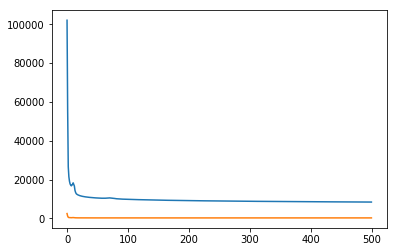

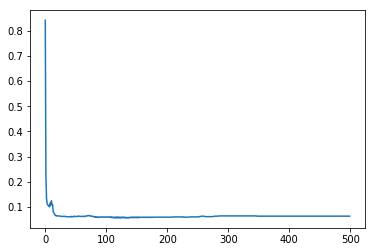

In [23]:
if __name__ == '__main__':
    Fun_GradientDecent()